In [20]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def utility_function(risk_factor, portfolio_return):
    value = ((1 + portfolio_return)**(1-risk_factor))/(1-risk_factor)
    return value

## Optimization formula:
## $\underset{\theta}{\max} \frac{1}{T} \sum^{T-1}_{t=0} u\left( \sum_{i=1}^{N_{t}}( \bar{w}_{i,t} + \frac{1}{N_{t}}\theta^{\text{T}} \hat{x}_{i,t} ) r_{i,t+1} \right) $

## Critical point of formula:

## $ \frac{1}{T} \sum^{T-1}_{t=0} u'(r_{p,t+1}) \frac{1}{N_{t}}\hat{x}_{t}^{\text{T}} r_{t+1} = 0 $


## Utility function

## $u(r_{p,t+1}) = \frac{(1+r_{p,t+1})^{1-\gamma}}{1-\gamma} $

## Portfolio return
## $ r_{p,t+1} = \sum^{N_{t}}_{i=1} \bar{w}_{i,t} r_{i,t+1} + \sum^{N_{t}}_{i=1} (  \frac{1}{N_{t}} \theta^{\text{T}} \hat{x}_{i,t} ) r_{i,t+1} $


## Utility function derivate

## $u'(r_{p,t+1}) = (1+r_{p, t+1})^{-\gamma} r'_{p, t+1} $

## Portfolio return derivate
## $ r'_{p,t+1} = \sum^{N_{t}}_{i=1} (  \frac{1}{N_{t}} \hat{x}_{i,t} ) r_{i,t+1} = \frac{1}{N_{t}}\hat{x}_{t}^{\text{T}} r_{t+1} $

## Critical point expanded:
## $ \frac{1}{T} \sum^{T-1}_{t=0} u'(r_{p,t+1}) \frac{1}{N_{t}}\hat{x}_{t}^{\text{T}} r_{t+1} = 0 $
## $ \frac{1}{T} \sum^{T-1}_{t=0} (1+r_{p, t+1})^{-\gamma} r'_{p, t+1} \frac{1}{N_{t}}\hat{x}_{t}^{\text{T}} r_{t+1} = 0 $
## $ \frac{1}{T} \sum^{T-1}_{t=0} (1+r_{p, t+1})^{-\gamma} (r'_{p, t+1})^2 $

In [29]:
from collections import defaultdict

time = 90 # 90 days
number_of_stocks = 10
np.random.seed(123)
r = dict()
gamma = 5
firm_characteristics = dict()
# random initialization of theta for 3 firm characteristics
theta = np.random.rand(1, 3)
# Learning rate
lr = 1e-3

return_all = []

# Creating artificial return
for i in range(number_of_stocks):
    r[i] = np.empty(time)
    firm_characteristics[i] = defaultdict(list)
    for t in range(time):
        # Toy firm characteristics 
        me = np.random.uniform(-1,1)
        btm = np.random.uniform(-1,1)
        mom = np.random.uniform(-1,1)
        firm_characteristics[i]['me'].append(me)
        firm_characteristics[i]['btm'].append(btm)
        firm_characteristics[i]['mom'].append(mom)
        # simplified weight using only firm characteristics
        # return of portifolio i at time t
        r[i][t] = (-0.337*me + 3.553*btm + 1.623*mom)

for k in range(100):
    for t in range(time):
        r_p_grad = 0
        r_p = 0
        # calculate gradient
        for i in range(number_of_stocks):
            firm_df = pd.DataFrame(firm_characteristics[i])
            r_p_grad += (1/number_of_stocks)*firm_df.iloc[t] * r[i][t]
            r_p += (1/number_of_stocks)*theta.dot(firm_df.iloc[t])*r[i][t]
        u_grad = pow((1+r_p),-gamma) *  r_p_grad
        gradient = u_grad * r_p_grad

        # gradient ascendent for each theta at time t
        theta += lr * gradient
    print(f" Theta :{theta}, k:{k}")
    # Avaliate function
    utility_values = []
    for t in range(time-1):
        r_p = 0
        for i in range(number_of_stocks):
            firm_df = pd.DataFrame(firm_characteristics[i])
            w_i_t = (1/number_of_stocks)*theta.dot(firm_df.iloc[t])
            r_p += w_i_t * r[i][t+1]
        utility_values.append(utility_function(5, r_p))
    
    return_portifolio = sum(utility_values)/len(utility_values)
    return_all.append(return_portifolio[0])
    print(f"Return {return_portifolio[0]}")

 Theta :[[0.74673557 0.36681471 0.24603293]], k:0
Return -1292483.2662629404
 Theta :[[0.78361807 0.42551266 0.26117447]], k:1
Return -3358250.9989958666
 Theta :[[0.81347746 0.47257087 0.27389835]], k:2
Return -439.1368789027147
 Theta :[[0.83890484 0.51226525 0.28498302]], k:3
Return -72.98810915795583
 Theta :[[0.8612412  0.5468244  0.29487008]], k:4
Return -44.60536628596451
 Theta :[[0.88128022 0.57757188 0.30383713]], k:5
Return -70.56820641249602
 Theta :[[0.89953456 0.60536391 0.31207144]], k:6
Return -281.7943884714868
 Theta :[[0.91635649 0.63078906 0.319706  ]], k:7
Return -4449.79600118692
 Theta :[[0.93199952 0.65427079 0.32683904]], k:8
Return -111105218821.95088
 Theta :[[0.94665278 0.67612477 0.33354543]], k:9
Return -6932.390990115848
 Theta :[[0.96046148 0.69659314 0.33988367]], k:10
Return -2039.018144456637
 Theta :[[0.97353977 0.71586602 0.34590045]], k:11
Return -10767.973310031412
 Theta :[[0.98597917 0.73409567 0.3516337 ]], k:12
Return -420958.4149206199
 Theta

KeyboardInterrupt: 

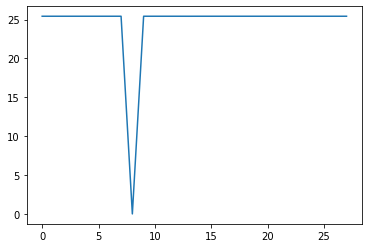

In [35]:
plt.plot(np.log([x+1-min(return_all) for x in return_all]))

In [ ]:


# benchmark portifolio weight of stock i on time t
w_i_t_bench = 1.0

# weight of stock i on time t
w_i_t = w_i_t_bench + (1/number_of_stocks)*X.dot(firm_characteristics)

# Where X is a vector of coefficients that we want to find and firm_characteristics are a vector of firm characteristics.


In [7]:
theta = np.random.rand(time, number_of_stocks, 3)